In [ ]:
!pip install torch torchvision matplotlib

In [ ]:
# import needed libraries

from google.colab import drive
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import pandas
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# define paths-
#Done: update/add paths for your dataset
data_path_train = '/content/drive/MyDrive/ACM_DAS/datasets/potato/train'
data_path_test = '/content/drive/MyDrive/ACM_DAS/datasets/potato/test'

Mounted at /content/drive


In [ ]:
# Done: create train and test transforms https://docs.pytorch.org/vision/0.9/transforms.html

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


In [ ]:
#Done: load the dataset
train_dataset=datasets.ImageFolder(root=data_path_train, transform=train_transforms)
test_dataset=datasets.ImageFolder(root=data_path_test, transform=test_transforms)

In [ ]:
# Done: split into train/test datasets if needed
import torch
from torch.utils.data import DataLoader, TensorDataset

# sample dummy image tensors
image_data = torch.randn(1000, 3, 64, 64)
labels = torch.randint(0, 10, (1000,))

dataset = TensorDataset(image_data, labels)

#Split into batches
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#to view every iterated batch
for batch_images, batch_labels in dataloader:
    print(f"Batch shape: {batch_images.shape}, Labels: {batch_labels}")

Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([9, 3, 5, 4, 1, 5, 2, 5, 9, 2, 1, 4, 8, 6, 2, 0, 5, 0, 3, 9, 4, 4, 3, 3,
        2, 4, 3, 1, 4, 3, 2, 1])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([4, 9, 2, 4, 6, 6, 7, 2, 2, 5, 6, 7, 1, 9, 5, 2, 1, 9, 2, 3, 2, 4, 7, 6,
        9, 9, 8, 2, 4, 7, 0, 7])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([7, 8, 8, 3, 4, 2, 6, 9, 6, 5, 2, 8, 6, 6, 2, 6, 5, 8, 9, 6, 9, 7, 3, 0,
        3, 2, 1, 3, 3, 5, 6, 5])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([7, 7, 1, 1, 5, 2, 1, 3, 8, 4, 9, 9, 7, 9, 3, 1, 5, 9, 9, 1, 3, 6, 7, 1,
        7, 0, 3, 4, 4, 5, 8, 7])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([3, 4, 4, 3, 9, 7, 5, 0, 6, 2, 2, 9, 1, 6, 9, 1, 6, 3, 5, 3, 9, 9, 5, 5,
        0, 6, 8, 6, 7, 0, 0, 6])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([8, 3, 1, 2, 4, 9, 9, 1, 6, 5, 4, 4, 9, 3, 7, 5, 5, 9, 3, 0, 7, 1, 7, 1,
        9, 0, 3, 8, 7, 8, 9, 7])
Batch shape: torch.Siz

In [ ]:
# update transforms if needed
train_dataset.transform = train_transforms
test_dataset.transform = test_transforms

In [ ]:
# some info about the datasets
print("Dataset classes: ", train_dataset.classes)
print("Num train samples:", len(train_dataset))
print("Num test samples:", len(test_dataset))

Dataset classes:  ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Num train samples: 2152
Num test samples: 2152


In [ ]:

BATCH_SIZE = 100;
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,  # Shuffle=True is crucial for training
    num_workers=2
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False, # No need to shuffle test data
    num_workers=2
)

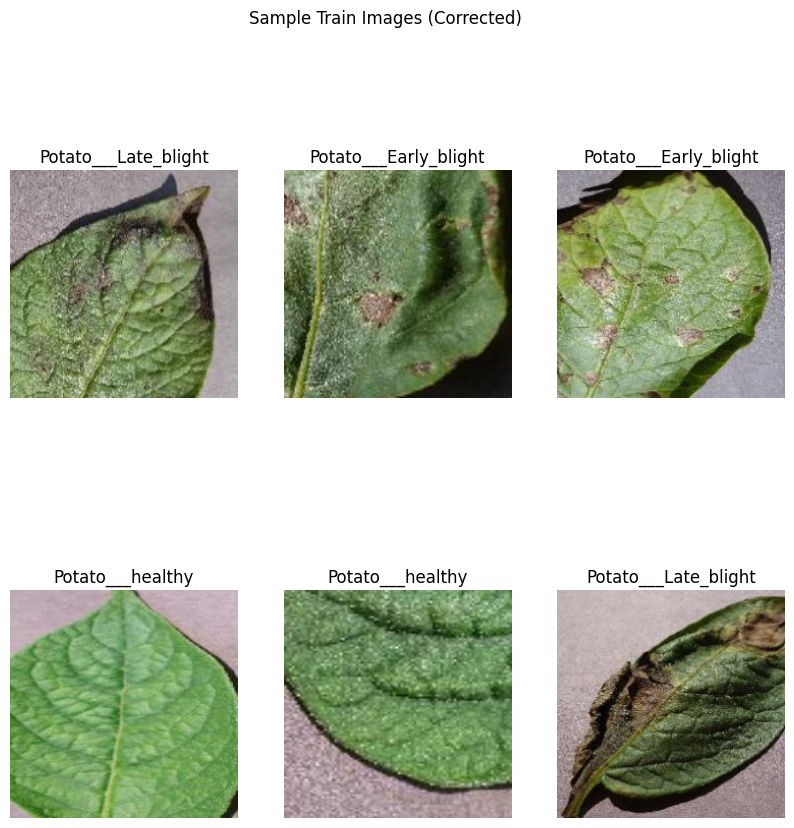

In [ ]:
# @title
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

def denormalize(image_tensor):
    img = image_tensor.clone()
    img = img * std.view(-1, 1, 1) + mean.view(-1, 1, 1)
    return img

# Get one batch
images, labels = next(iter(train_loader))
class_names = train_dataset.classes

# Plot them
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    img = denormalize(images[i])
    img_np = img.permute(1, 2, 0).cpu().numpy()
    img_np = np.clip(img_np, 0, 1)
    plt.imshow(img_np)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.suptitle("Sample Train Images (Corrected)")
plt.show()

Sample train images: 


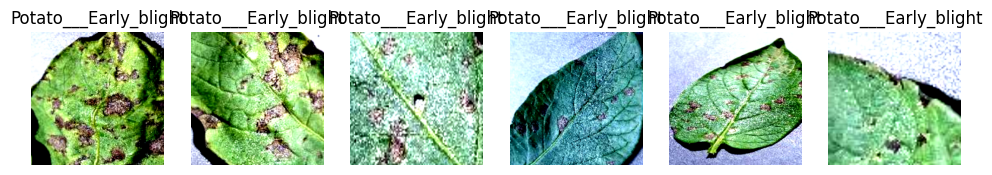

Sample test images: 


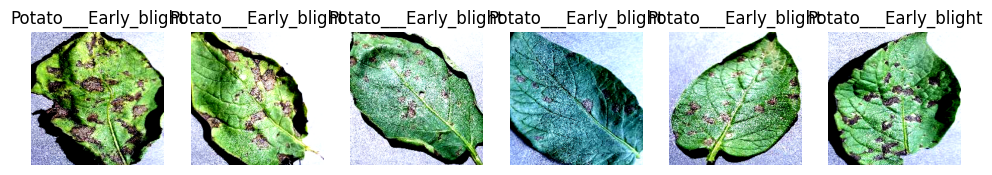

In [ ]:
# use block above to show images
# show some images
def show_sample_images(dataset, n):
  fig, ax = plt.subplots(1, n, figsize=(12,3))
  for i in range(n):
    img, label = dataset[i]
    img = (img/2) + 0.5
    ax[i].imshow(img.permute(1,2,0))
    ax[i].set_title(dataset.classes[label])
    ax[i].axis('off')
  plt.show()

print("Sample train images: ")
show_sample_images(train_dataset, 6)
print("Sample test images: ")
show_sample_images(test_dataset, 6)

In [ ]:
# show shape of dataloader
for images, labels in train_loader:
  print("Batch shape: ", images.shape)
  print("Label shape: ", labels.shape)
  break

Batch shape:  torch.Size([100, 3, 224, 224])
Label shape:  torch.Size([100])


In [ ]:
# define cnn model

class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 224, 224)
            dummy_output = self.pool2(F.relu(self.conv2(self.pool(F.relu(self.conv1(dummy_input))))))
            flattened_size = dummy_output.numel()


        self.fc1 = nn.Linear(flattened_size, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# define device, model, loss function, and optimizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(num_classes=len(train_dataset.classes))
model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# DONE: complete training loop

for epoch in range(20):
  model.train()
  running_loss = 0.0;

  for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) # Move data to the device

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs) # Use the initialized model instance
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 11 == 10:
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
          running_loss = 0.0

[1,    11] loss: 0.326
[1,    22] loss: 0.089
[2,    11] loss: 0.063
[2,    22] loss: 0.059
[3,    11] loss: 0.055
[3,    22] loss: 0.049
[4,    11] loss: 0.048
[4,    22] loss: 0.046
[5,    11] loss: 0.040
[5,    22] loss: 0.038
[6,    11] loss: 0.036
[6,    22] loss: 0.030
[7,    11] loss: 0.030
[7,    22] loss: 0.030
[8,    11] loss: 0.032
[8,    22] loss: 0.026
[9,    11] loss: 0.024
[9,    22] loss: 0.024
[10,    11] loss: 0.023
[10,    22] loss: 0.027
[11,    11] loss: 0.024
[11,    22] loss: 0.021
[12,    11] loss: 0.022
[12,    22] loss: 0.021
[13,    11] loss: 0.023
[13,    22] loss: 0.019
[14,    11] loss: 0.020
[14,    22] loss: 0.019
[15,    11] loss: 0.018
[15,    22] loss: 0.018
[16,    11] loss: 0.016
[16,    22] loss: 0.020
[17,    11] loss: 0.020
[17,    22] loss: 0.023
[18,    11] loss: 0.020
[18,    22] loss: 0.017
[19,    11] loss: 0.016
[19,    22] loss: 0.015
[20,    11] loss: 0.017
[20,    22] loss: 0.017


In [ ]:
# DONE: complete evaluation loop

model.eval()
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        images, labels = images.to(device), labels.to(device) # Move data to the device
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {total} test images: {100 * correct / total} %')


Accuracy of the network on the 2152 test images: 91.96096654275092 %


In [ ]:
# to save model after training

saved_model_path = '/content/drive/MyDrive/ACM_DAS/my_model.pt'
torch.save(model.state_dict(), saved_model_path)

In [ ]:
# to load model again

my_model = CNN(num_classes=len(train_dataset.classes))
state_dict = torch.load(saved_model_path)
my_model.load_state_dict(state_dict)
my_model = my_model.to(device)

In [ ]:
# gradio example

import numpy as np
import gradio as gr
import time
import random
from PIL import Image
import torch
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

# mount drive
from google.colab import drive
drive.mount('/content/drive')

SAVED_MODEL_PATH = '/content/drive/MyDrive/ACM_DAS/my_model.pt'

CLASS_LABELS = [
    "Potato Early Blight",
    "Potato Late Blight",
    "Potato Healthy"
]

IMG_SIZE = 224
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        dummy_input = torch.zeros(1, 3, IMG_SIZE, IMG_SIZE)
        dummy_output = self.pool2(F.relu(self.conv2(self.pool1(F.relu(self.conv1(dummy_input))))))
        flattened_size = dummy_output.numel()

        self.fc1 = nn.Linear(flattened_size, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


PREDICTION_TRANSFORMS = transforms.Compose([
    transforms.Resize(256),       # Resize to 256
    transforms.CenterCrop(IMG_SIZE), # Crop to 224x224
    transforms.ToTensor(),        # Convert to tensor (0-1 float, C x H x W)
    transforms.Normalize(         # Normalize with your specific mean/std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

try:
    num_classes = len(CLASS_LABELS)
    # Initialize model on the device (CPU/GPU)
    model = CNN(num_classes=num_classes).to(DEVICE)

    # Load the state dictionary
    state_dict = torch.load(SAVED_MODEL_PATH, map_location=DEVICE)
    model.load_state_dict(state_dict)

    # Set model to evaluation mode (Crucial!)
    model.eval()
    print(f"Successfully loaded model from {SAVED_MODEL_PATH} and set to {DEVICE}.")

except FileNotFoundError:
    print("--- ERROR: Model file not found! ---")
    print(f"Please check the path: {SAVED_MODEL_PATH}")
    print("Using a dummy model for demonstration. Predictions will be random.")
    # Fallback to a dummy model if the file isn't found
    class DummyModel(nn.Module):
        def forward(self, x):
            # Returns a random output tensor with the correct shape
            return torch.rand(1, num_classes)
    model = DummyModel().to(DEVICE)
    model.eval()
except Exception as e:
    print(f"--- ERROR loading model: {e} ---")
    # Fallback to a dummy model if loading fails
    class DummyModel(nn.Module):
        def forward(self, x):
            # Returns a random output tensor with the correct shape
            return torch.rand(1, num_classes)
    model = DummyModel().to(DEVICE)
    model.eval()




def classify_potato_leaf(image: np.ndarray):
    """
    The main prediction function called by Gradio.
    It takes an image (as a NumPy array from Gradio) and returns a dictionary
    of class probabilities for the gr.Label component.
    """
    if image is None:
        return {"Error, no image was uploaded": 1.0}

    # Simulate processing time to make it feel like a real model prediction
    time.sleep(0.5)

    try:
        # Convert NumPy array to a PIL Image,
        if image.ndim == 2:
            # Grayscale image (H x W) -> Convert to L (PIL Grayscale) -> Convert to RGB
            pil_image = Image.fromarray(image.astype(np.uint8), 'L').convert('RGB')
        elif image.ndim == 3 and image.shape[2] == 4:
            # RGBA image (H x W x 4) -> Drop alpha channel
            # Ensure proper scaling if input was float
            if image.dtype in [np.float32, np.float64]:
                 image = (image * 255).astype(np.uint8)
            pil_image = Image.fromarray(image[:, :, :3], 'RGB')
        else:
            # Standard RGB (H x W x 3)
            # Scale float arrays (0.0-1.0) to 0-255 before creating the PIL Image
            if image.dtype in [np.float32, np.float64]:
                 image = (image * 255).astype(np.uint8)
            pil_image = Image.fromarray(image, 'RGB')

    except Exception as e:
        print(f"Image conversion error: {e}")
        return {"Error: Could not convert image for model input": 1.0}


    # --- STEP B: PIL Image to PyTorch Tensor ---
    # Apply your specific pre-processing steps defined in PREDICTION_TRANSFORMS
    tensor_input = PREDICTION_TRANSFORMS(pil_image)

    # Add a batch dimension (C x H x W) -> (1 x C x H x W)
    tensor_input = tensor_input.unsqueeze(0)

    # Move the tensor to the correct device (CPU or CUDA)
    tensor_input = tensor_input.to(DEVICE)

    # --- STEP C: GET PREDICTION ---
    # Perform the forward pass without gradient calculations (evaluation mode)
    with torch.no_grad():
        outputs = model(tensor_input)

    # 1. Convert logits to probabilities (Softmax)
    probabilities = F.softmax(outputs, dim=1)[0]

    # 2. Convert probabilities to a Python dictionary for Gradio's gr.Label
    probabilities_dict = {
        CLASS_LABELS[i]: probabilities[i].item() for i in range(len(CLASS_LABELS))
    }

    return probabilities_dict




image_input = gr.Image(
    type="numpy",       # Gradio will convert the uploaded image to a NumPy array
    label="Upload Potato Leaf Image"
)

# Define the output component (Label for prediction results)
output_label = gr.Label(
    num_top_classes=3,  # Show all three class results
    label="Model Prediction"
)

# Create the Gradio Interface
demo = gr.Interface(
    fn=classify_potato_leaf,
    inputs=image_input,
    outputs=output_label,
    title="Potato Leaf Disease Classifier (Gradio)",
    description="Upload an image of a potato leaf to get a prediction for Early Blight, Late Blight, or Healthy status."
)

# The following line starts the web app when the script is executed.
if __name__ == "__main__":

  demo.launch(share=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully loaded model from /content/drive/MyDrive/ACM_DAS/my_model.pt and set to cuda.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bf1e5e4c8ba6f11e45.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
